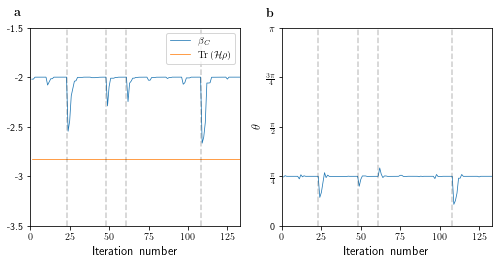

In [1]:
# Importing python functions
import numpy as np
import numba as nb

# Importing figure properties
from figure_test_files.figure_properties import *

# Importing functions
from Bell_operator.Bell_operator import calc_Bell_operator
from pauli_matrices.pauli_matrices import X, Z

# Importing matplotlib packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec



# Defining the number of qubits
N = 2

# Defining the Hamiltonian
H = np.sqrt(2)*(np.kron(Z, Z) + np.kron(X, X)) 

# Calculating the eigenvalues and eigenstates
eig_vals, eig_vecs = np.linalg.eigh(H)

# extracting the ground state energy and the respective eigenstate
psi_G = np.zeros((2**N, 1))
psi_G[:,0] = eig_vecs[:,0]
rho = np.matmul(psi_G, np.transpose(psi_G))

# Defining number of measurements and the angles of the N*m-1 measurements
m = nb.typed.List(
    [2, 2]
)

# Defining measurements
theta = [np.pi/4]

# Initializing basis and extra Z gate
basis = 'XZ'
extra_gate = False

# Calculating eigenvalue of the Bell operator
beta_Q= calc_Bell_operator(theta, H, rho, N, m, basis, extra_gate)



# loading files
beta_C = np.load(save_file_dir+'toy_model/beta_C.npy')
stored_angles = np.load(save_file_dir+'toy_model/theta.npy')

# Obtaining number of steos
n = np.linspace(1, len(beta_C), len(beta_C))

# Obtaining lines at which the new basinhopping steps start.
starts = []
for j in range(len(n)-1):
    if beta_C[j]-beta_C[j+1] > .1:
        starts.append(n[j])

# Initlazing the text locations and linewidth 
x = -10
lw = .75

# initializing figures
fig =plt.figure(figsize=(1/0.75 * lwidth, 1/0.85 * lwidth/2))
gs = gridspec.GridSpec(
    nrows=1,
    ncols=2,
    figure=fig,
    width_ratios=[1, 1],
    height_ratios=[1],
    wspace=0.2,
)

# Adding first figure
ax = fig.add_subplot(gs[0, 0])
ax.plot( n, np.array(beta_C) , label=r'$\beta_C$', linewidth=lw)
ax.plot( n, np.ones(len(beta_C))*beta_Q, 
label=r'$\mathrm{Tr}\left( \mathcal{H} \rho \right)$', linewidth=lw)
for j in starts:
    ax.axvline(j, color='k', linestyle='--', alpha=.2)
ax.legend()
ax.set_xlabel(r'Iteration number')
ax.set_ylim((-3.5, -1.5))
ax.set_xlim((0, n[-1]))
ax.set_yticks([-3.5, -3, -2.5, -2, -1.5])
ax.set_yticklabels([-3.5, -3, -2.5, -2, -1.5])
ax.text(x, -1.375, '$\mathbf{a}$',  size = MEDIUM_SIZE)

# Adding second figure
ax = fig.add_subplot(gs[0, 1])
angles = np.array(stored_angles)
ax.plot(n, angles, label=r'$\theta$', linewidth=lw)
for j in starts:
    ax.axvline(j, color='k', linestyle='--', alpha=.2)
ax.set_yticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_yticklabels([0, r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'])
ax.set_xlabel(r'Iteration number')
ax.set_ylim((0, np.pi))
ax.set_xlim((0, n[-1]))
ax.set_ylabel(r'$\theta$')
ax.text(x, np.pi+.175, '$\mathbf{b}$',  size = MEDIUM_SIZE)

# Saving the figure
fig.savefig(save_fig_dir+'toy_model/results_toy_model.png', dpi = 300, bbox_inches='tight')   